# in this note book we tried diff preprocessing and text_represntation techniques with different ML models to get the best results on ML notebook

In [ ]:
import pandas as pd
import pandas as pd 
import numpy as np
import string
import nltk
import re 
import os 
import random 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/all_data.csv" , lineterminator='\n')

In [ ]:
 df.head()

,id,tweets,dialect
0,1175358310087892992,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .,IQ
1,1175416117793349632,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...,IQ
2,1175450108898565888,@KanaanRema مبين من كلامه خليجي,IQ
3,1175471073770573824,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐,IQ
4,1175496913145217024,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺,IQ


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458197 entries, 0 to 458196
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       458197 non-null  int64 
 1   tweets   458197 non-null  object
 2   dialect  458197 non-null  object
dtypes: int64(1), object(2)
memory usage: 10.5+ MB


In [ ]:
len(df)

458197

In [ ]:
df.sample(10)

,id,tweets,dialect
331297,730292112089042944,الفلوس ليش موجوده ؟ مو عشان تستانس فيها؟ ولا ع...,KW
162878,1144770070972964864,@AbuSaud46863131 كم دفعله محمد عشان هالحركة🤪🤪🤪,JO
95935,1057413795373559808,@RahmaMo74627218 بطاريه 😂 ،دوبها محطة توليد لي...,PL
269163,1083066634477162368,#ارفعوا_الحصانة_عن_مرتضي\nقالها الشعب وسيظل يق...,EG
48539,619312580738293760,@nbenotman صدقني خلاص ملينا وفاضت بينا وموعدنا...,LY
234676,924365923636703232,@osam_2008 @Kuwait_okk 1جزائريه 2دافع عن بلدك ...,DZ
270651,979363188637601792,كميه قهر في الصوره دي \nربنا يفك كرب كل اهلنا ...,EG
120501,543437998663434240,لما تسمع عن اللي بصير في #مخيم_اليرموك .. وتشو...,PL
118897,1021781660751331200,أنا ما بحيش أحكي في هيك أمور بس والله كمية الن...,PL
6336,1076918165433733248,@AmriiiAl @lyh610386 @akklaph اذا داعش عنده تق...,IQ


In [ ]:
df.shape

(458197, 3)

In [ ]:
df["dialect"].isna().sum()

0

In [ ]:
df["dialect"].value_counts()
# it is imbalanced data

EG    57636
PL    43742
KW    42109
LY    36499
QA    31069
JO    27921
LB    27617
SA    26832
AE    26296
BH    26292
OM    19116
SY    16242
DZ    16183
IQ    15497
SD    14434
MA    11539
YE     9927
TN     9246
Name: dialect, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.hist(df["dialect"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


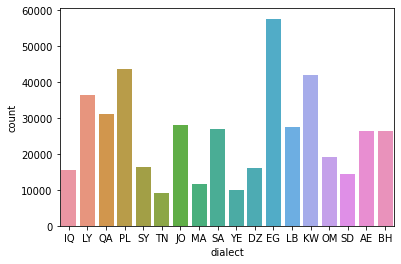

In [ ]:
sns.countplot(df["dialect"])
#this data slightly unbalanced 

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

# # normalize_arabic

In [ ]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ه", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

# remove_repeating_char

In [ ]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

# remove non arabic words

In [ ]:
def nospecial(text):
	import re
	text = re.sub("[a-zA-Z0-9]+", "",text)
	return text

# processPost for applying all functions

In [ ]:
def preprocess_text(tweet): 

    #remove emoji
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    tweet = emoji_pattern.sub(r'', tweet)
    
  
    #remove tashkeel
    p_tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    tweet = re.sub(p_tashkeel,"", tweet)

    #Replace @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)
    
    #Convert www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet= remove_punctuations(tweet)
    
    # normalize the tweet
     #tweet= normalize_arabic(tweet)
    
    # remove repeated letters
    tweet=remove_repeating_char(tweet)

    #remove non arabic words
    tweet = nospecial(tweet)

    #trim    
    tweet = tweet.strip()

      #text stemming
    from nltk.stem.isri import ISRIStemmer
    st = ISRIStemmer()
    ISRIStemmer().suf32(tweet)
    
    return tweet

In [ ]:
print(f"Orignal Text : {df.tweets[13]}")
print()
print(f"Preprocessed Text : {preprocess_text(df.tweets[13])}")

Orignal Text : @3Obeidi ههههه عدوله گلبه ورم من عدنه .. گلك خل اتونس همه بكل شيء مارضين😂😂 فهاي السفره اسمها .،، اتونس وبكيفي🤪

Preprocessed Text : ه عدوله گلبه ورم من عدنه گلك خل اتونس همه بكل شيء مارضين فهاي السفره اسمها اتونس وبكيفي🤪


In [ ]:
from nltk.stem.isri import ISRIStemmer
st = ISRIStemmer()
ISRIStemmer().suf32("اعلاميون")

'اعلامي'

In [ ]:
df.tweets = df.tweets.map(preprocess_text)
df.head()

,id,tweets,dialect
0,1175358310087892992,لكن بالنهاية ينتفض يغير,IQ
1,1175416117793349632,يعني هذا محسوب على البشر حيونه وحشيه وتطلبون م...,IQ
2,1175450108898565888,مبين من كلامه خليجي,IQ
3,1175471073770573824,يسلملي مرورك وروحك الحلوه,IQ
4,1175496913145217024,وين هل الغيبه اخ محمد,IQ


# Getting Tokenize the tweet text

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
df["tweets"] = df["tweets"].apply(tokenizer.tokenize)

In [ ]:
df.sample(10)

,id,tweets,dialect
287505,805719154452004864,"[لية, كل, حاجه, حلوه, سعرها, اتغير]",EG
30949,970705651776278400,"[وبحب, الناس, الرايقه, الي, بتضحك, على, طول, ا...",LY
17012,904374864009719808,"[اله, يهديه, ويصلح, حاله, مسكين, واجعني, حاله]",LY
268063,1175591497049288704,"[الي, حيتطاول, علي, د, محمد, سليم, العوا, حمسح...",EG
333708,766273216289570816,"[لا, يكون, تعلمت, أمل, على, موضوع, سالفة, شلون...",KW
308779,1176527529512964096,"[ما, بتسمع, اخبار, بس, بليز, ما, تشيل, الفولو]",LB
100319,939890651935789056,"[مش, فاهمة, كمية, الحقد, الي, فيك, ع, الفلسطين...",PL
150501,999328538326073216,"[شالوم, الحلقة, الثالثة, سليم, شيبوب]",TN
31336,989635486833696768,"[ريقه, ينشف, اتقول, واكل, بلح]",LY
116138,962382852561276800,"[ه, ولك, مبينه, عشان, تعرف, انوا, مؤمن, وبصلي,...",PL


# Removing stop words

In [ ]:
from nltk.corpus import stopwords
import nltk

In [ ]:
nltk.download('stopwords')
stopwords_list = stopwords.words('arabic')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# stopwords_list

In [ ]:
df["tweets"]=df["tweets"].apply(lambda x: [item for item in x if item not in stopwords_list])

In [ ]:
df.head()

,id,tweets,dialect
0,1175358310087892992,"[بالنهاية, ينتفض, يغير]",IQ
1,1175416117793349632,"[يعني, محسوب, البشر, حيونه, وحشيه, وتطلبون, ال...",IQ
2,1175450108898565888,"[مبين, كلامه, خليجي]",IQ
3,1175471073770573824,"[يسلملي, مرورك, وروحك, الحلوه]",IQ
4,1175496913145217024,"[وين, الغيبه, اخ, محمد]",IQ


In [ ]:
df["tweets"]=df["tweets"].apply(lambda x: " ".join(x) )

In [ ]:
df.head()

,id,tweets,dialect
0,1175358310087892992,بالنهاية ينتفض يغير,IQ
1,1175416117793349632,يعني محسوب البشر حيونه وحشيه وتطلبون الغرب يحت...,IQ
2,1175450108898565888,مبين كلامه خليجي,IQ
3,1175471073770573824,يسلملي مرورك وروحك الحلوه,IQ
4,1175496913145217024,وين الغيبه اخ محمد,IQ


In [ ]:
from collections import Counter
import random
from termcolor import colored
from sklearn.datasets import fetch_20newsgroups
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df["dialect"] = labelencoder.fit_transform(df["dialect"])


x = df.tweets
y = df.dialect
print(f'DATA : {x[0]}')
print(f'LABEL: {y[0]}')

DATA : بالنهاية ينتفض يغير
LABEL: 4


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, stratify=y, random_state=42)

In [ ]:
x_train.head()

93216                                 اي اشي يمحي الذنوب
318987                    بنعرف وحياة سيدي العريان بنعرف
201005                 ماش يابراق ليلتين والوضع ركود خير
93449                        حاسه حالي شب مش شايفه الفرق
247614    ودعم لارهاب كمان اعتقد ده الي يقصده بالتشابكات
Name: tweets, dtype: object

# at first we will try some text representation with the same ML model (LogisticRegression) to find best way with our data

## 1-count vectorizer  

In [ ]:
vectorizer = CountVectorizer() # till now before we experiment spacy is the best represnration 
vectorizer.fit(x_train)
x_train_v = vectorizer.transform(x_train)
x_test_v = vectorizer.transform(x_test)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline


clf = LogisticRegression()
pipe = make_pipeline(vectorizer, clf)
pipe.fit(x_train, y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn import metrics

def print_report(pipe, x_test, y_test):
    y_pred = pipe.predict(x_test)
    report = metrics.classification_report(y_test, y_pred)
    print(report)
    print("accuracy: {:0.3f}".format(metrics.accuracy_score(y_test, y_pred)))

print_report(pipe, x_test, y_test)

              precision    recall  f1-score   support

           0       0.43      0.38      0.40      5259
           1       0.35      0.33      0.34      5258
           2       0.60      0.49      0.54      3237
           3       0.66      0.84      0.74     11527
           4       0.65      0.50      0.56      3099
           5       0.41      0.36      0.38      5584
           6       0.44      0.57      0.50      8422
           7       0.61      0.65      0.62      5524
           8       0.61      0.68      0.64      7300
           9       0.75      0.55      0.63      2308
          10       0.39      0.33      0.36      3823
          11       0.48      0.51      0.50      8749
          12       0.47      0.45      0.46      6214
          13       0.38      0.42      0.40      5367
          14       0.72      0.53      0.61      2887
          15       0.47      0.33      0.39      3248
          16       0.67      0.39      0.49      1849
          17       0.40    

2- TF-IDF with n - grams 

In [ ]:
vec = TfidfVectorizer(analyzer='char_wb', ngram_range=(3, 5), min_df=.01, max_df=.3)

In [ ]:
clf = LogisticRegression()

In [ ]:
pipe = make_pipeline(vec, clf)
pipe.fit(x_train, y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn import metrics

def print_report(pipe, x_test, y_test):
    y_pred = pipe.predict(x_test)
    report = metrics.classification_report(y_test, y_pred)
    print(report)
    print("accuracy: {:0.3f}".format(metrics.accuracy_score(y_test, y_pred)))

print_report(pipe, x_test, y_test)

              precision    recall  f1-score   support

           0       0.38      0.38      0.38      5259
           1       0.34      0.32      0.33      5258
           2       0.53      0.51      0.52      3237
           3       0.71      0.78      0.75     11527
           4       0.55      0.50      0.52      3099
           5       0.36      0.34      0.35      5584
           6       0.47      0.49      0.48      8422
           7       0.59      0.61      0.60      5524
           8       0.63      0.64      0.63      7300
           9       0.66      0.57      0.61      2308
          10       0.34      0.32      0.33      3823
          11       0.44      0.50      0.47      8749
          12       0.44      0.43      0.43      6214
          13       0.38      0.37      0.38      5367
          14       0.61      0.52      0.56      2887
          15       0.39      0.33      0.36      3248
          16       0.56      0.43      0.49      1849
          17       0.26    

In [ ]:
vec = TfidfVectorizer()

In [ ]:
pipe = make_pipeline(vec, clf)
pipe.fit(x_train, y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn import metrics

def print_report(pipe, x_test, y_test):
    y_pred = pipe.predict(x_test)
    report = metrics.classification_report(y_test, y_pred)
    print(report)
    print("accuracy: {:0.3f}".format(metrics.accuracy_score(y_test, y_pred)))

print_report(pipe, x_test, y_test)

              precision    recall  f1-score   support

           0       0.42      0.37      0.39      5259
           1       0.36      0.26      0.30      5258
           2       0.63      0.42      0.50      3237
           3       0.65      0.83      0.73     11527
           4       0.67      0.44      0.53      3099
           5       0.43      0.30      0.35      5584
           6       0.36      0.65      0.47      8422
           7       0.60      0.63      0.62      5524
           8       0.54      0.67      0.60      7300
           9       0.80      0.49      0.61      2308
          10       0.43      0.25      0.32      3823
          11       0.44      0.55      0.49      8749
          12       0.46      0.43      0.45      6214
          13       0.37      0.39      0.38      5367
          14       0.73      0.46      0.57      2887
          15       0.52      0.26      0.35      3248
          16       0.69      0.32      0.44      1849
          17       0.60    

# 3-we will try word embedding by araVec model 

In [ ]:
import numpy as np
from tqdm.auto import tqdm
from sklearn.datasets import fetch_20newsgroups
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report


In [ ]:
x_train_v = np.zeros((len(x_train), 300))
x_test_v = np.zeros((len(x_test), 300))

In [ ]:
x_train_v

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
len(x_train_v)

366557

In [ ]:
x_train_v.shape

(366557, 300)

In [ ]:
!pip install spacy

In [ ]:
import spacy

In [ ]:
# !python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 1.3 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=814690115810c25a29f3a8941979ea9333978d339bf4c1cbb6a13ef2134df2e8
  Stored in directory: /tmp/pip-ephem-wheel-cache-icnucmtc/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
! pip install gensim

In [ ]:
from gensim import corpora
from gensim import models
from gensim.models import LdaModel
from gensim.models import TfidfModel
from gensim.models import CoherenceModel
from gensim.models.wrappers import LdaMallet

In [ ]:
import gensim

In [ ]:
!wget https://bakrianoo.ewr1.vultrobjects.com/aravec/full_grams_cbow_300_twitter.zip

--2022-03-08 11:34:12--  https://bakrianoo.ewr1.vultrobjects.com/aravec/full_grams_cbow_300_twitter.zip
Resolving bakrianoo.ewr1.vultrobjects.com (bakrianoo.ewr1.vultrobjects.com)... 108.61.0.122, 2001:19f0:0:22::100
Connecting to bakrianoo.ewr1.vultrobjects.com (bakrianoo.ewr1.vultrobjects.com)|108.61.0.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3325529808 (3.1G) [application/zip]
Saving to: ‘full_grams_cbow_300_twitter.zip’

full_grams_cbow_300 100%[===================>]   3.10G  17.6MB/s    in 54s     

2022-03-08 11:35:06 (58.7 MB/s) - ‘full_grams_cbow_300_twitter.zip’ saved [3325529808/3325529808]



In [ ]:
!unzip /content/full_grams_cbow_300_twitter.zip


Archive:  /content/full_grams_cbow_300_twitter.zip
  inflating: full_grams_cbow_300_twitter.mdl  
  inflating: full_grams_cbow_300_twitter.mdl.trainables.syn1neg.npy  
  inflating: full_grams_cbow_300_twitter.mdl.wv.vectors.npy  


In [ ]:
# adapted from https://github.com/bakrianoo/aravec
import gensim
import spacy 
import nltk 

# Load AraVec model from gensim    
model = gensim.models.Word2Vec.load("/content/full_grams_cbow_300_twitter.mdl")

# export to word2vec format for spacy model
model.wv.save_word2vec_format("aravec.txt")


In [ ]:
!gzip /content/aravec.txt
!python -m spacy  init-model ar spacy.aravec.model --vectors-loc aravec.txt.gz
 
# # load spacy model 
nlp = spacy.load("spacy.aravec.model")

✔ Successfully created model
⠙ Reading vectors from aravec.txt.gztcmalloc: large alloc 1772060672 bytes == 0x55a06102e000 @  0x7f928386e001 0x7f92811bd1af 0x7f9281213c23 0x7f9281214a87 0x7f92812b6823 0x55a05ef3e34c 0x55a05ef3e120 0x55a05efb2b80 0x55a05ef3f9da 0x55a05efadeae 0x55a05efad02f 0x55a05ef3faba 0x55a05efadeae 0x55a05efad02f 0x55a05ee7eeb0 0x55a05efaf633 0x55a05efad66e 0x55a05ef3faba 0x55a05efae108 0x55a05efad02f 0x55a05ef3faba 0x55a05efb22c0 0x55a05efad02f 0x55a05efacd43 0x55a05efab1b0 0x55a05ef3e229 0x55a05ef3e120 0x55a05efb1f33 0x55a05efad02f 0x55a05ef3faba 0x55a05efadeae
1476715it [02:42, 9065.25it/s]
✔ Loaded vectors from aravec.txt.gz
✔ Sucessfully compiled vocab
1476903 entries, 1476715 vectors


In [ ]:
for i, doc in tqdm(enumerate(nlp.pipe(x_train)), total=len(x_train)):
    x_train_v[i, :] = doc.vector

for i, doc in tqdm(enumerate(nlp.pipe(x_test)), total=len(x_test)):
    x_test_v[i, :] = doc.vector

  0%|          | 0/366557 [00:00<?, ?it/s]

  0%|          | 0/91640 [00:00<?, ?it/s]

In [ ]:
clf = LogisticRegression()
clf.fit(x_train_v, y_train)
print(classification_report(y_test, clf.predict(x_test_v)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.28      0.21      0.24      5259
           1       0.25      0.13      0.17      5258
           2       0.39      0.30      0.34      3237
           3       0.59      0.86      0.70     11527
           4       0.54      0.42      0.47      3099
           5       0.29      0.14      0.19      5584
           6       0.36      0.59      0.45      8422
           7       0.47      0.52      0.49      5524
           8       0.46      0.56      0.51      7300
           9       0.63      0.46      0.53      2308
          10       0.22      0.10      0.14      3823
          11       0.38      0.50      0.43      8749
          12       0.35      0.37      0.36      6214
          13       0.32      0.40      0.36      5367
          14       0.57      0.34      0.42      2887
          15       0.35      0.11      0.17      3248
          16       0.48      0.14      0.22      1849
          17       0.33    

# conclusion best text representation with logestic regression is count_vectorizer 

In [ ]:
most_similar = model.wv.most_similar( "ازيك", topn=10 )

In [ ]:
most_similar

[('ازايك', 0.6702398061752319),
 ('عامله_ايه', 0.6635982990264893),
 ('فينك', 0.6273040175437927),
 ('ازييك', 0.6192640066146851),
 ('ايش_اخبارك', 0.6150068640708923),
 ('مساء_الفل', 0.5970253944396973),
 ('طمنيني_عليكي', 0.591467559337616),
 ('ربنا_يخليك', 0.5797526836395264),
 ('بقولك_ايه', 0.5682606101036072),
 ('حمدلله_ع_السلامه', 0.5654823184013367)]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline


clf = LinearSVC()
pipe = make_pipeline(vectorizer, clf)
pipe.fit(x_train, y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
print_report(pipe, x_test, y_test)

              precision    recall  f1-score   support

           0       0.38      0.38      0.38      5259
           1       0.34      0.32      0.33      5258
           2       0.53      0.51      0.52      3237
           3       0.71      0.78      0.75     11527
           4       0.55      0.50      0.52      3099
           5       0.36      0.34      0.35      5584
           6       0.47      0.49      0.48      8422
           7       0.59      0.61      0.60      5524
           8       0.63      0.64      0.63      7300
           9       0.66      0.57      0.61      2308
          10       0.34      0.32      0.33      3823
          11       0.44      0.50      0.47      8749
          12       0.44      0.43      0.43      6214
          13       0.38      0.37      0.38      5367
          14       0.61      0.52      0.56      2887
          15       0.39      0.33      0.36      3248
          16       0.56      0.43      0.49      1849
          17       0.26    

In [ ]:
import xgboost; print(xgboost.__version__)
from xgboost import XGBClassifier

0.90


In [ ]:
xg = XGBClassifier()
pipe = make_pipeline(vectorizer, xg)
pipe.fit(x_train, y_train);

In [ ]:
print_report(pipe, x_test, y_test)

              precision    recall  f1-score   support

           0       0.47      0.14      0.22      5259
           1       0.70      0.08      0.15      5258
           2       0.71      0.23      0.34      3237
           3       0.54      0.65      0.59     11527
           4       0.74      0.20      0.32      3099
           5       0.47      0.11      0.18      5584
           6       0.14      0.84      0.24      8422
           7       0.52      0.38      0.44      5524
           8       0.63      0.31      0.41      7300
           9       0.80      0.29      0.42      2308
          10       0.54      0.09      0.15      3823
          11       0.40      0.30      0.35      8749
          12       0.47      0.21      0.29      6214
          13       0.43      0.17      0.25      5367
          14       0.71      0.28      0.40      2887
          15       0.64      0.09      0.17      3248
          16       0.64      0.24      0.35      1849
          17       0.64    

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

# here we will try grid search to find model best parameters with tf-idf representation then we will try by count vectorizer

In [ ]:
# make pipeline
pipe = make_pipeline(TfidfVectorizer(),
                    LogisticRegression())
# make param grid
param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}

# create and fit the model
model = GridSearchCV(pipe, param_grid, cv=5)
model.fit(x_train,y_train)

# make prediction and print accuracy
prediction = model.predict(x_test)
print(f"Accuracy score is {accuracy_score(y_test, prediction):.2f}")
print(classification_report(y_test, prediction))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy score is 0.50
              precision    recall  f1-score   support

           0       0.41      0.36      0.38      5259
           1       0.37      0.26      0.30      5258
           2       0.62      0.43      0.51      3237
           3       0.62      0.86      0.72     11527
           4       0.69      0.43      0.53      3099
           5       0.42      0.29      0.34      5584
           6       0.37      0.63      0.47      8422
           7       0.60      0.63      0.61      5524
           8       0.56      0.66      0.60      7300
           9       0.80      0.49      0.61      2308
          10       0.43      0.26      0.32      3823
          11       0.45      0.54      0.49      8749
          12       0.46      0.45      0.45      6214
          13       0.36      0.40      0.37      5367
          14       0.76      0.45      0.56      2887
          15       0.54      0.24      0.33      3248
          16       0.73      0.29      0.41      1849
    

In [ ]:
pipe = make_pipeline(TfidfVectorizer(),
                    RandomForestClassifier())

param_grid = {'randomforestclassifier__n_estimators':[10, 100, 1000],
              
             'randomforestclassifier__max_features':['sqrt', 'log2']}

rf_model = GridSearchCV(pipe, param_grid, cv=5)
rf_model.fit(x_train,y_train)

prediction = rf_model.predict(x_test)
print(f"Accuracy score is {accuracy_score(y_test, prediction):.2f}")

In [ ]:

pipe = make_pipeline(TfidfVectorizer(),
                     SVC())
param_grid = {'svc__kernel': ['rbf', 'linear', 'poly'],
             'svc__gamma': [0.1, 1, 10, 100],
             'svc__C': [0.1, 1, 10, 100]}

svc_model = GridSearchCV(pipe, param_grid, cv=3)
svc_model.fit(x_train, y_train)

prediction = svc_model.predict(x_test)
print(f"Accuracy score is {accuracy_score(y_test, prediction):.2f}")
print(classification_report(y_test, prediction))

In [ ]:
pipe = make_pipeline(CountVectorizer(),
                    RandomForestClassifier())

param_grid = {'randomforestclassifier__n_estimators':[10, 100, 1000],
             'randomforestclassifier__max_features':['sqrt', 'log2']}

rf_model = GridSearchCV(pipe, param_grid, cv=5)
rf_model.fit(x_train,y_train)

prediction = rf_model.predict(x_test)
print(f"Accuracy score is {accuracy_score(y_test, prediction):.2f}")

# we will use weighted classes feature to treat with imbalanced classes

In [ ]:
from sklearn.metrics import f1_score
def conf_matrix(y_test, pred_test):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    
#Calling function 
conf_matrix(y_test, pred_test)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg', class_weight='balanced')
lr.fit(x_train, y_train)

# Predicting on the test data
pred_test = lr.predict(x_test)

#Calculating and printing the f1 score 
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

#Ploting the confusion matrix
conf_matrix(y_test, pred_test)

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
lr = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(x_train, y_train)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)
